__Challenge__: evaluate your sentiment classifier
It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

Do any of your classifiers seem to overfit?  
Which seem to perform the best? Why?  
Which features seemed to be most impactful to performance?  
Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.  

__Checkpoint__
Submit your ideas or a link to your work here and use it as a conversation starter during your next mentor session.

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score

In [177]:
#import data
yelp_df = pd.read_csv(r'C:\Users\User\Documents\Github\thinkful_notes\data_sets\sentiment_labelled_sentences\yelp_labelled.txt',
                      sep='\t', header=None)

In [178]:
#review data
pd.set_option('display.max_colwidth', 120)
yelp_df.rename(index=str, columns={0:'sentence', 1:'score'}, inplace=True)

In [179]:
#yelp_df.tail(100)    #uncomment to review text fields for possible features

In [180]:
def model_builder(df=yelp_df, kwords=[]):
    '''
    takes df and kwords and returns dataframe with features
    '''
    #build classifier
    temp_df = df.copy()
    for kword in kwords:
        temp_df[kword] = temp_df.sentence.str.contains(' ' + str(kword) + '[ \.]', case=False)

    #add case-based feature
    temp_df['yelling'] = temp_df.sentence.str.isupper()
    #get count of features positives
    print(temp_df.iloc[:,2:-1].sum()) #show count of occurances of feature
    return temp_df

In [181]:
def review_model_quality(data_source):
    '''
    takes data_source and prints quality review and returns copy of model
    '''
    #investigate keywords
    sns.set_style(style='dark')
    sns.heatmap(data_source.corr());

    #prepare for model
    data = data_source.iloc[:,2:-1]    #don't include text field or target column
    target = data_source["score"]
    data.head()
    #instantiate model
    nb_bernou = naive_bayes.BernoulliNB()
    nb_bernou.fit(data, target)
    y_predict = nb_bernou.predict(data)

    #result
    correct = (y_predict==target).sum()
    total = (y_predict).shape[0]
    print('model correctly predicted {} out of {} or {}%'.format(correct,total,(correct*100/total)))
    print('crossvalidation scores are: {}'.format(cross_val_score(nb_bernou, target.values.reshape((-1,1)), y_predict, cv=6)))
    return nb_bernou

In [182]:
#original model
keywords1 = ['loved', 'prompt', 'overpriced', 'slow', 'tasty', 'delicious', 'favorite', 'angry', 'great', 'would not']
model1_df = model_builder(df=yelp_df, kwords=keywords1)

loved          9
prompt         1
overpriced     4
slow          10
tasty          8
delicious     11
favorite       2
angry          1
great         43
would not      6
dtype: int64


model correctly predicted 567 out of 1000 or 56.7%
crossvalidation scores are: [0.92261905 0.92814371 0.92814371 0.92771084 0.92771084 0.92771084]


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

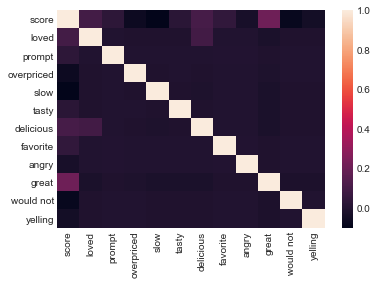

In [183]:
review_model_quality(model1_df)

In [184]:
#model 2
keywords2 = ['sucks', 'slow', 'delicious', 'great', 'worst', 'delight', 'poor']
df2 = model_builder(kwords=keywords2)

sucks         3
slow         10
delicious    11
great        43
worst        10
delight       1
poor          5
dtype: int64


model correctly predicted 555 out of 1000 or 55.5%
crossvalidation scores are: [0.94047619 0.94610778 0.94610778 0.94578313 0.94578313 0.94578313]


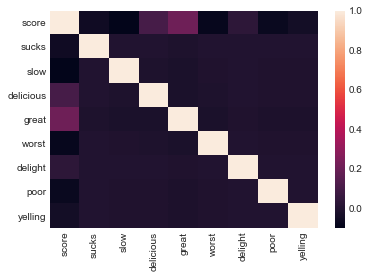

In [185]:
model2 = review_model_quality(data_source=df2)

In [186]:
keywords3 = ['pro', 'con', 'busy', 'disappointment', 'avoid', 'disappointed', 'average', 'gross']

In [187]:
df3 = model_builder(kwords=keywords3)

pro                0
con                0
busy               3
disappointment     3
avoid              3
disappointed      16
average            4
gross              1
dtype: int64


model correctly predicted 522 out of 1000 or 52.2%
crossvalidation scores are: [0.97005988 0.97005988 0.97005988 0.97005988 0.96987952 0.96987952]


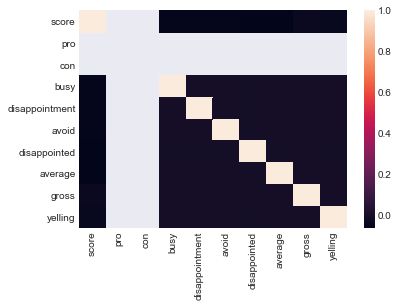

In [188]:
model3 = review_model_quality(df3)

In [189]:
review_model_quality?

In [190]:
keywords4 = ['rude', 'nasty', 'hell', 'suck', 'amazing', 'sad', 'sick']
df4 = model_builder(kwords=keywords4)

rude        7
nasty       2
hell        0
suck        0
amazing    15
sad         4
sick        5
dtype: int64


model correctly predicted 518 out of 1000 or 51.8%
crossvalidation scores are: [0.98203593 0.98203593 0.98203593 0.98203593 0.98192771 0.98192771]


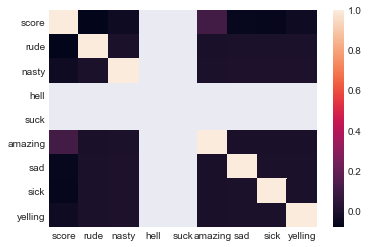

In [191]:
model4 = review_model_quality(data_source=df4)

In [192]:
keywords5 = ['amazing', 'rude', 'disappointed', 'great', 'delicious', 'slow']

In [193]:
df5 = model_builder(kwords=keywords5)

amazing         15
rude             7
disappointed    16
great           43
delicious       11
slow            10
dtype: int64


model correctly predicted 566 out of 1000 or 56.6%
crossvalidation scores are: [0.92857143 0.92857143 0.93373494 0.93373494 0.93373494 0.93373494]


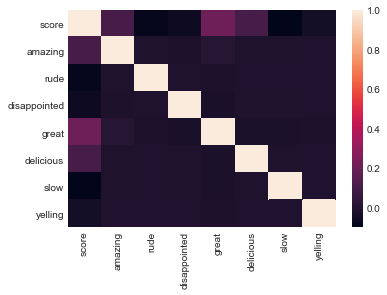

In [194]:
model5 = review_model_quality(data_source=df5)

the more words added seems to be the best way to improve the model, more than picking out the 'best' (frequently used) words. 

loved              9
prompt             1
overpriced         4
slow              10
tasty              8
delicious         11
favorite           2
angry              1
great             43
would not          6
sucks              3
worst             10
delight            1
poor               5
pro                0
con                0
busy               3
disappointment     3
avoid              3
disappointed      16
average            4
gross              1
rude               7
nasty              2
hell               0
suck               0
amazing           15
sad                4
sick               5
dtype: int64
model correctly predicted 581 out of 1000 or 58.1%
crossvalidation scores are: [0.91071429 0.91017964 0.91017964 0.91566265 0.91566265 0.91566265]


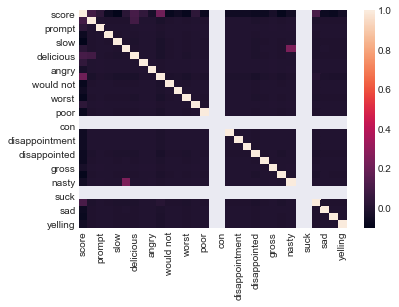

In [200]:
#try appending all and using in model
all_keywords = keywords1+keywords2+keywords3+keywords4+keywords5

all_keywords = list(dict.fromkeys(all_keywords)) #remove duplicates
all_kw_df = model_builder(kwords=all_keywords)
all_kw_model = review_model_quality(all_kw_df)

didn't really improve things much...